In [1]:
import random
import numpy as np
import innvestigate
import matplotlib.pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\cnn_gru_list_tuning.pkl", "rb") as f:
    cnn_gru_tuning = pickle.load(f)

In [3]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\cnn_lstm_list_tuning.pkl", "rb") as f:
    cnn_lstm_tuning = pickle.load(f)

In [4]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\cnn_attention_gru_list_tuning.pkl", "rb") as f:
    cnn_attention_gru_tuning = pickle.load(f)

In [5]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\standard_scaler.pkl", "rb") as f:
    standard_scaler = pickle.load(f)

In [6]:
standard_scaler

StandardScaler()

In [7]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\X_resampling.pkl", "rb") as f:
    X_resampling = pickle.load(f)

In [8]:
# Buka file pickle menggunakan path relatif
with open("C:\\Users\\Administrator\\Documents\\my TA model\\y_resampling.pkl", "rb") as f:
    y_resampling = pickle.load(f)

In [9]:
X_resampling = standard_scaler.transform(X_resampling)

In [10]:
def XAI_pred(model, random_number):
    print("Data number: ", random_number)
    print("Real Label: ", y_resampling[random_number])

    pred = model.predict(X_resampling[random_number].reshape(1, 24, 1))
    prediction = np.argmax(pred)
    print("Prediction: ", prediction)
    
    analyzer = innvestigate.create_analyzer('input', model)
    relevance = analyzer.analyze(X_resampling[random_number].reshape(1, 24, 1))

    # Ubah ndarray menjadi list
    relevance_list = relevance.squeeze().tolist()

    # Urutkan list secara menurun
    sorted_relevance = sorted(enumerate(relevance_list), key=lambda x: x[1], reverse=True)

    # Ambil elemen pertama setelah diurutkan
    top_relevance = sorted_relevance[:25]

    # Buat dictionary dari hasil urutan dengan indeks sebagai kunci dan nilai sebagai nilai
    top_dict = {index: value for index, value in top_relevance}

    print(top_dict)

    total_relevance = sum(top_dict.values())
    print("Total relevance:", total_relevance)

    # Filter nilai yang di atas 0.0 dan ambil indeksnya
    filtered_indices = [index for index, value in enumerate(relevance_list) if value > 0.0]

    print(filtered_indices)
    
    relevance_resized = np.resize(relevance, (1, 24, 1))

    plt.figure(figsize=(20, 5))
    plt.imshow(relevance_resized, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.show()

In [11]:
random_number = np.random.randint(0, len(X_resampling))

Model Number:  1
Data number:  877
Real Label:  3


1/1 [==============================] - 2s 2s/step
Prediction:  3
{15: 1.668782353401184, 0: 1.622626781463623, 6: 1.3488153219223022, 23: 1.2422306537628174, 22: 1.099890112876892, 8: 0.9687263369560242, 14: 0.8979873061180115, 9: 0.781083881855011, 3: 0.580207347869873, 2: 0.5147517323493958, 13: 0.4262998402118683, 7: 0.35899636149406433, 10: -0.020681798458099365, 18: -0.11280670017004013, 4: -0.4010271728038788, 1: -0.4356088936328888, 21: -0.5453026294708252, 5: -0.5954740643501282, 12: -0.7151254415512085, 17: -0.7347874641418457, 19: -0.7564836740493774, 20: -0.7603970170021057, 11: -0.9360153079032898, 16: -1.1339325904846191}
Total relevance: 4.36275527626276
[0, 2, 3, 6, 7, 8, 9, 13, 14, 15, 22, 23]


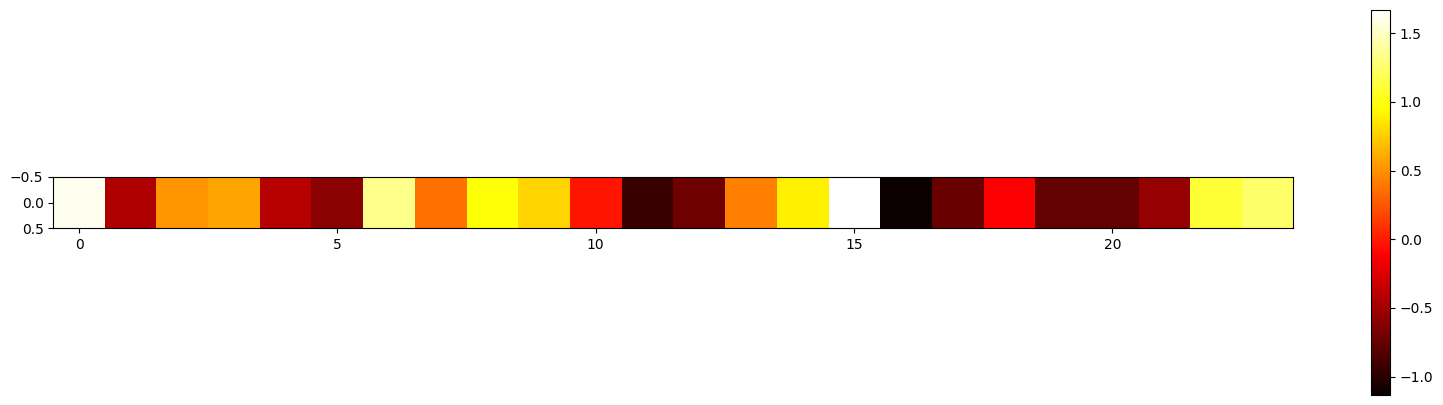

Model Number:  2
Data number:  877
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{15: 1.668782353401184, 0: 1.622626781463623, 6: 1.3488153219223022, 23: 1.2422306537628174, 22: 1.099890112876892, 8: 0.9687263369560242, 14: 0.8979873061180115, 9: 0.781083881855011, 3: 0.580207347869873, 2: 0.5147517323493958, 13: 0.4262998402118683, 7: 0.35899636149406433, 10: -0.020681798458099365, 18: -0.11280670017004013, 4: -0.4010271728038788, 1: -0.4356088936328888, 21: -0.5453026294708252, 5: -0.5954740643501282, 12: -0.7151254415512085, 17: -0.7347874641418457, 19: -0.7564836740493774, 20: -0.7603970170021057, 11: -0.9360153079032898, 16: -1.1339325904846191}
Total relevance: 4.36275527626276
[0, 2, 3, 6, 7, 8, 9, 13, 14, 15, 22, 23]


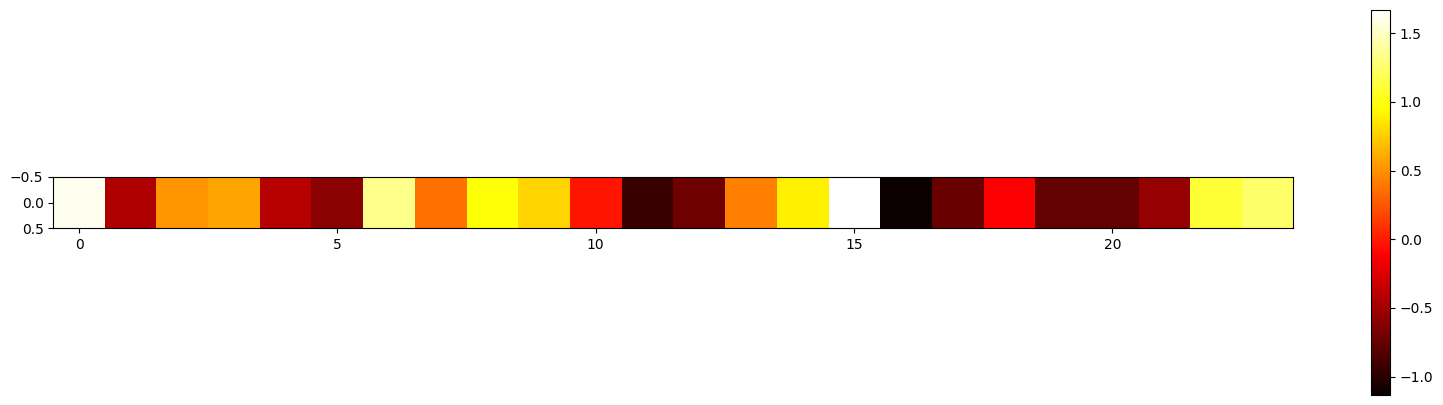

Model Number:  3
Data number:  877
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{15: 1.668782353401184, 0: 1.622626781463623, 6: 1.3488153219223022, 23: 1.2422306537628174, 22: 1.099890112876892, 8: 0.9687263369560242, 14: 0.8979873061180115, 9: 0.781083881855011, 3: 0.580207347869873, 2: 0.5147517323493958, 13: 0.4262998402118683, 7: 0.35899636149406433, 10: -0.020681798458099365, 18: -0.11280670017004013, 4: -0.4010271728038788, 1: -0.4356088936328888, 21: -0.5453026294708252, 5: -0.5954740643501282, 12: -0.7151254415512085, 17: -0.7347874641418457, 19: -0.7564836740493774, 20: -0.7603970170021057, 11: -0.9360153079032898, 16: -1.1339325904846191}
Total relevance: 4.36275527626276
[0, 2, 3, 6, 7, 8, 9, 13, 14, 15, 22, 23]


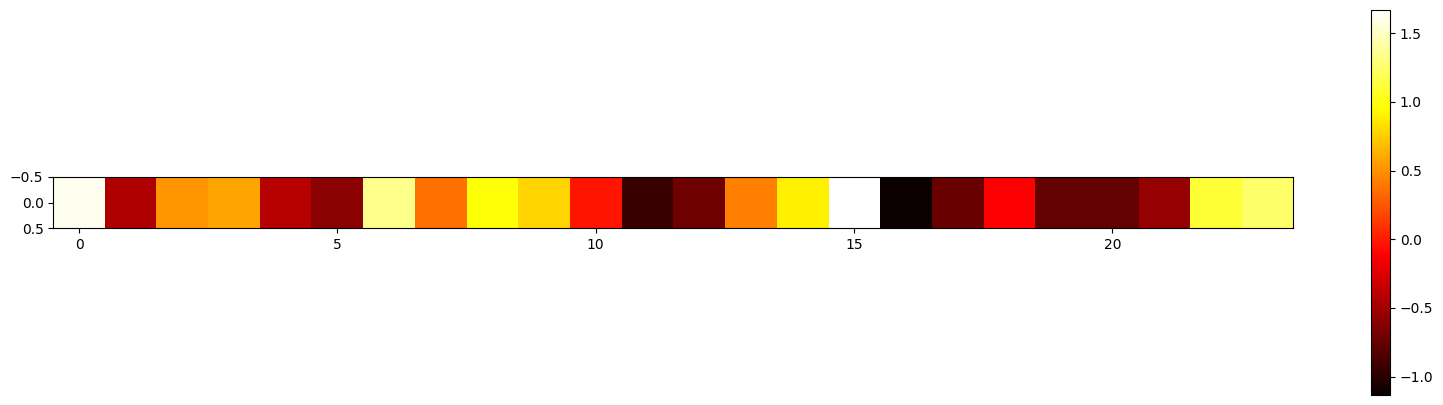

Model Number:  4
Data number:  877
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{15: 1.668782353401184, 0: 1.622626781463623, 6: 1.3488153219223022, 23: 1.2422306537628174, 22: 1.099890112876892, 8: 0.9687263369560242, 14: 0.8979873061180115, 9: 0.781083881855011, 3: 0.580207347869873, 2: 0.5147517323493958, 13: 0.4262998402118683, 7: 0.35899636149406433, 10: -0.020681798458099365, 18: -0.11280670017004013, 4: -0.4010271728038788, 1: -0.4356088936328888, 21: -0.5453026294708252, 5: -0.5954740643501282, 12: -0.7151254415512085, 17: -0.7347874641418457, 19: -0.7564836740493774, 20: -0.7603970170021057, 11: -0.9360153079032898, 16: -1.1339325904846191}
Total relevance: 4.36275527626276
[0, 2, 3, 6, 7, 8, 9, 13, 14, 15, 22, 23]


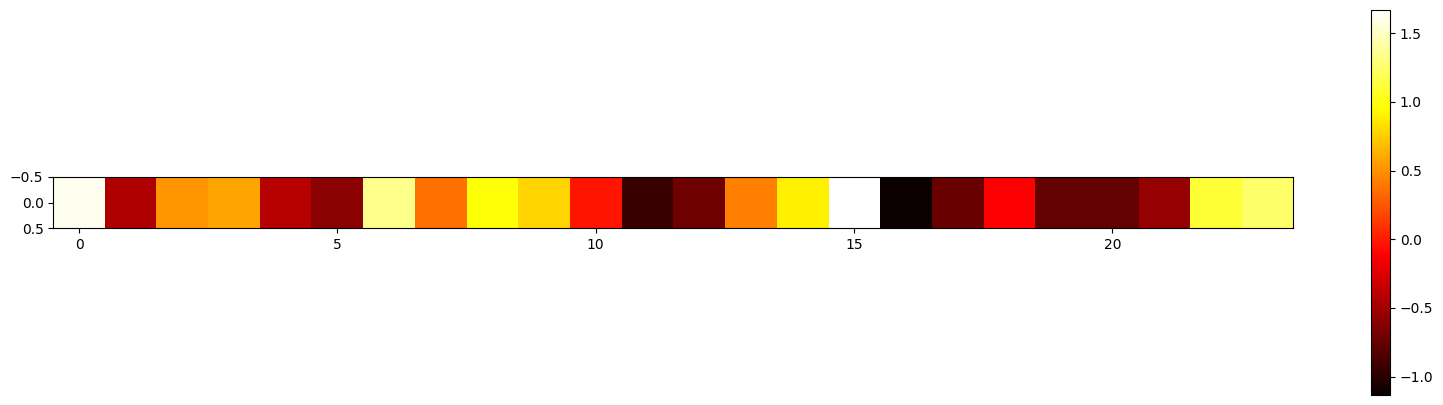

Model Number:  5
Data number:  877
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{15: 1.668782353401184, 0: 1.622626781463623, 6: 1.3488153219223022, 23: 1.2422306537628174, 22: 1.099890112876892, 8: 0.9687263369560242, 14: 0.8979873061180115, 9: 0.781083881855011, 3: 0.580207347869873, 2: 0.5147517323493958, 13: 0.4262998402118683, 7: 0.35899636149406433, 10: -0.020681798458099365, 18: -0.11280670017004013, 4: -0.4010271728038788, 1: -0.4356088936328888, 21: -0.5453026294708252, 5: -0.5954740643501282, 12: -0.7151254415512085, 17: -0.7347874641418457, 19: -0.7564836740493774, 20: -0.7603970170021057, 11: -0.9360153079032898, 16: -1.1339325904846191}
Total relevance: 4.36275527626276
[0, 2, 3, 6, 7, 8, 9, 13, 14, 15, 22, 23]


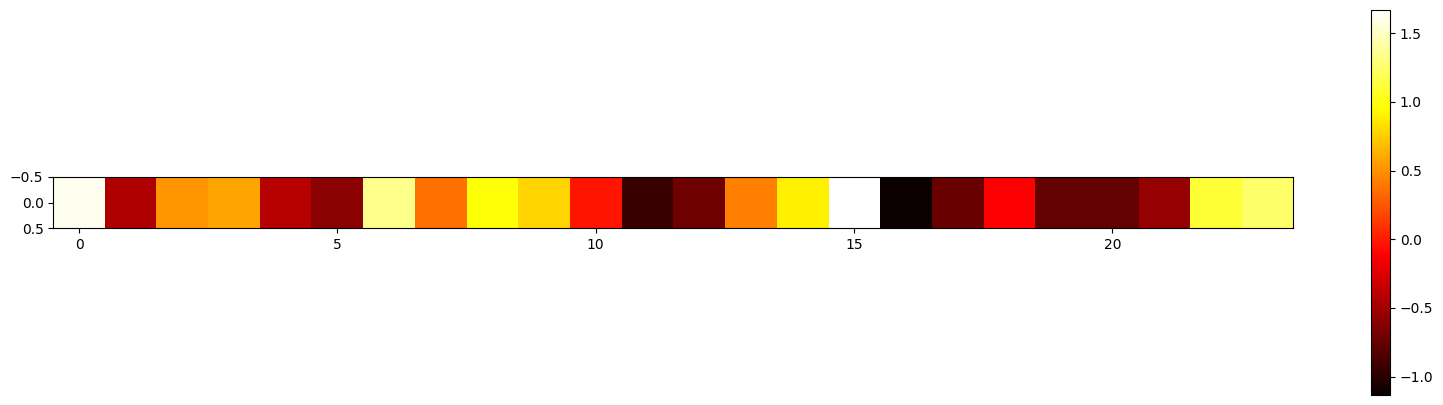

In [12]:
for i, model in enumerate(cnn_gru_tuning):
    print("Model Number: ", i+1)
    XAI_pred(model, random_number)


Model Number:  1
Data number:  877
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{15: 1.668782353401184, 0: 1.622626781463623, 6: 1.3488153219223022, 23: 1.2422306537628174, 22: 1.099890112876892, 8: 0.9687263369560242, 14: 0.8979873061180115, 9: 0.781083881855011, 3: 0.580207347869873, 2: 0.5147517323493958, 13: 0.4262998402118683, 7: 0.35899636149406433, 10: -0.020681798458099365, 18: -0.11280670017004013, 4: -0.4010271728038788, 1: -0.4356088936328888, 21: -0.5453026294708252, 5: -0.5954740643501282, 12: -0.7151254415512085, 17: -0.7347874641418457, 19: -0.7564836740493774, 20: -0.7603970170021057, 11: -0.9360153079032898, 16: -1.1339325904846191}
Total relevance: 4.36275527626276
[0, 2, 3, 6, 7, 8, 9, 13, 14, 15, 22, 23]


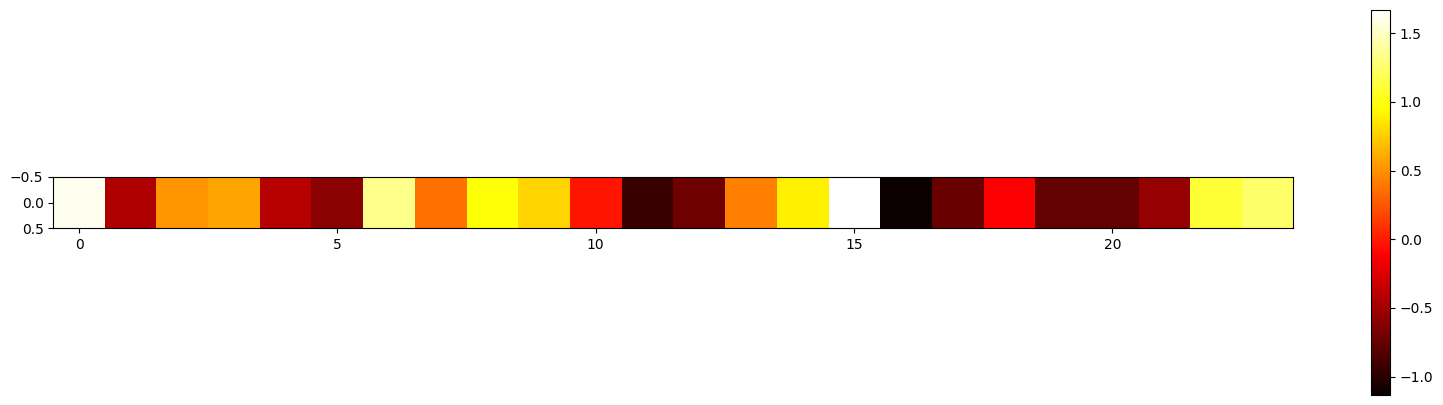

Model Number:  2
Data number:  877
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{15: 1.668782353401184, 0: 1.622626781463623, 6: 1.3488153219223022, 23: 1.2422306537628174, 22: 1.099890112876892, 8: 0.9687263369560242, 14: 0.8979873061180115, 9: 0.781083881855011, 3: 0.580207347869873, 2: 0.5147517323493958, 13: 0.4262998402118683, 7: 0.35899636149406433, 10: -0.020681798458099365, 18: -0.11280670017004013, 4: -0.4010271728038788, 1: -0.4356088936328888, 21: -0.5453026294708252, 5: -0.5954740643501282, 12: -0.7151254415512085, 17: -0.7347874641418457, 19: -0.7564836740493774, 20: -0.7603970170021057, 11: -0.9360153079032898, 16: -1.1339325904846191}
Total relevance: 4.36275527626276
[0, 2, 3, 6, 7, 8, 9, 13, 14, 15, 22, 23]


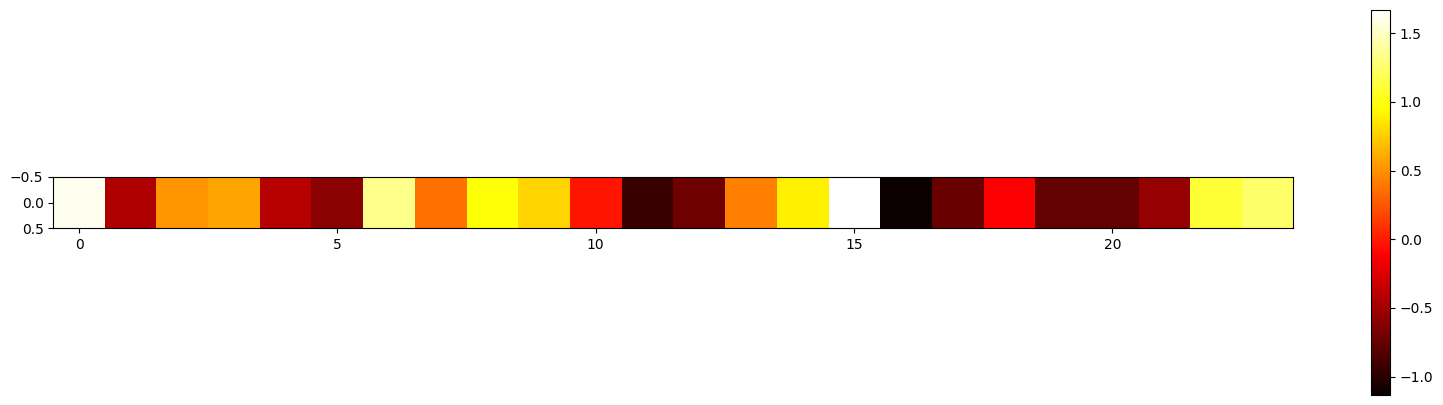

Model Number:  3
Data number:  877
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{15: 1.668782353401184, 0: 1.622626781463623, 6: 1.3488153219223022, 23: 1.2422306537628174, 22: 1.099890112876892, 8: 0.9687263369560242, 14: 0.8979873061180115, 9: 0.781083881855011, 3: 0.580207347869873, 2: 0.5147517323493958, 13: 0.4262998402118683, 7: 0.35899636149406433, 10: -0.020681798458099365, 18: -0.11280670017004013, 4: -0.4010271728038788, 1: -0.4356088936328888, 21: -0.5453026294708252, 5: -0.5954740643501282, 12: -0.7151254415512085, 17: -0.7347874641418457, 19: -0.7564836740493774, 20: -0.7603970170021057, 11: -0.9360153079032898, 16: -1.1339325904846191}
Total relevance: 4.36275527626276
[0, 2, 3, 6, 7, 8, 9, 13, 14, 15, 22, 23]


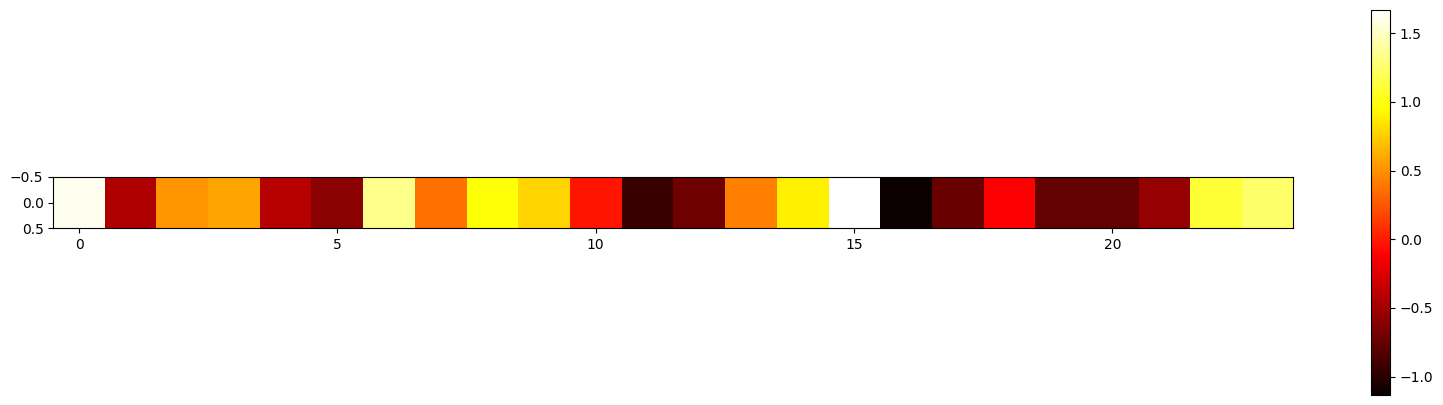

Model Number:  4
Data number:  877
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{15: 1.668782353401184, 0: 1.622626781463623, 6: 1.3488153219223022, 23: 1.2422306537628174, 22: 1.099890112876892, 8: 0.9687263369560242, 14: 0.8979873061180115, 9: 0.781083881855011, 3: 0.580207347869873, 2: 0.5147517323493958, 13: 0.4262998402118683, 7: 0.35899636149406433, 10: -0.020681798458099365, 18: -0.11280670017004013, 4: -0.4010271728038788, 1: -0.4356088936328888, 21: -0.5453026294708252, 5: -0.5954740643501282, 12: -0.7151254415512085, 17: -0.7347874641418457, 19: -0.7564836740493774, 20: -0.7603970170021057, 11: -0.9360153079032898, 16: -1.1339325904846191}
Total relevance: 4.36275527626276
[0, 2, 3, 6, 7, 8, 9, 13, 14, 15, 22, 23]


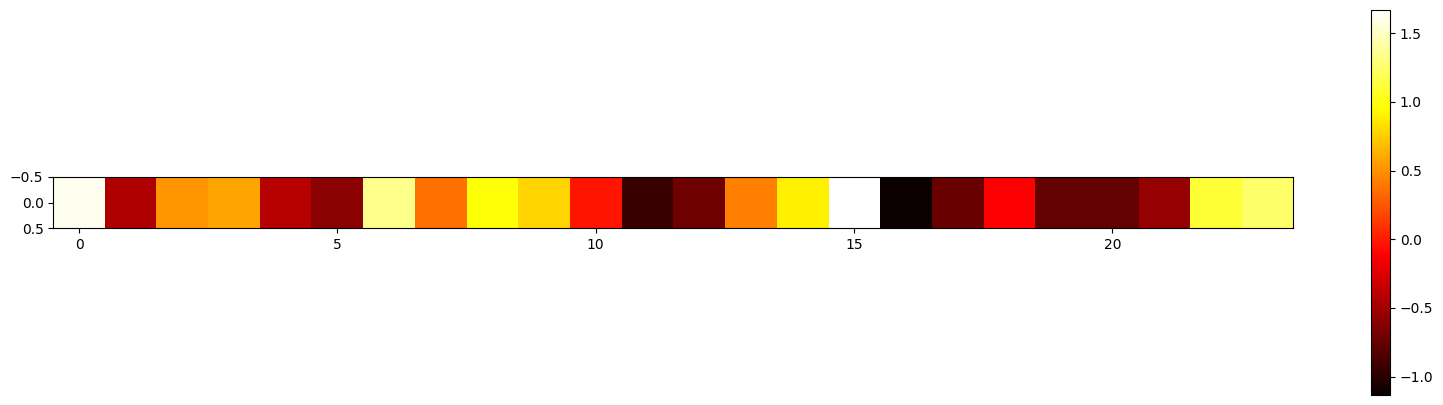

Model Number:  5
Data number:  877
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{15: 1.668782353401184, 0: 1.622626781463623, 6: 1.3488153219223022, 23: 1.2422306537628174, 22: 1.099890112876892, 8: 0.9687263369560242, 14: 0.8979873061180115, 9: 0.781083881855011, 3: 0.580207347869873, 2: 0.5147517323493958, 13: 0.4262998402118683, 7: 0.35899636149406433, 10: -0.020681798458099365, 18: -0.11280670017004013, 4: -0.4010271728038788, 1: -0.4356088936328888, 21: -0.5453026294708252, 5: -0.5954740643501282, 12: -0.7151254415512085, 17: -0.7347874641418457, 19: -0.7564836740493774, 20: -0.7603970170021057, 11: -0.9360153079032898, 16: -1.1339325904846191}
Total relevance: 4.36275527626276
[0, 2, 3, 6, 7, 8, 9, 13, 14, 15, 22, 23]


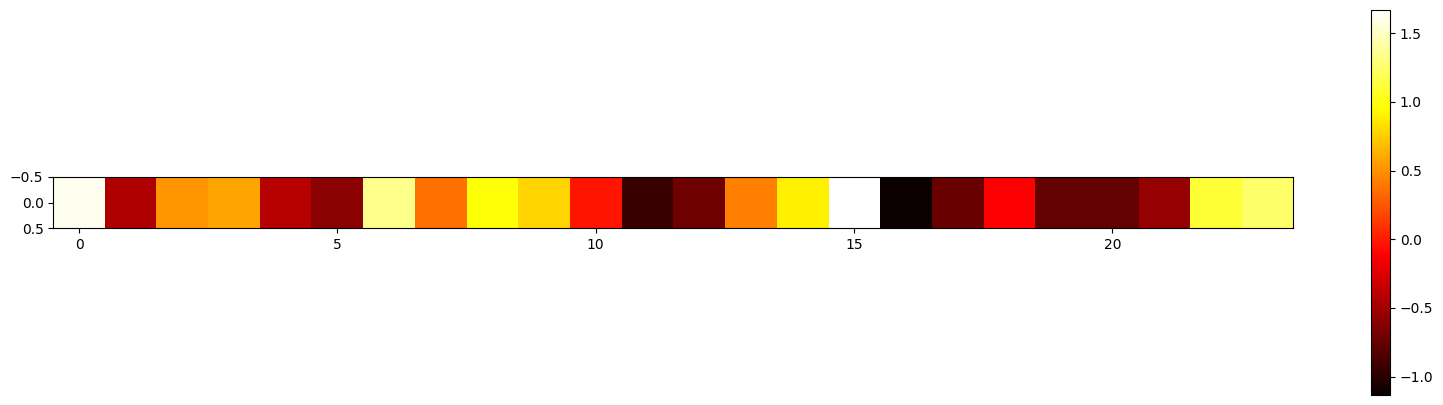

In [13]:
for i, model in enumerate(cnn_lstm_tuning):
    print("Model Number: ", i+1)
    XAI_pred(model, random_number)

Model Number:  1
Data number:  877
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{15: 1.668782353401184, 0: 1.622626781463623, 6: 1.3488153219223022, 23: 1.2422306537628174, 22: 1.099890112876892, 8: 0.9687263369560242, 14: 0.8979873061180115, 9: 0.781083881855011, 3: 0.580207347869873, 2: 0.5147517323493958, 13: 0.4262998402118683, 7: 0.35899636149406433, 10: -0.020681798458099365, 18: -0.11280670017004013, 4: -0.4010271728038788, 1: -0.4356088936328888, 21: -0.5453026294708252, 5: -0.5954740643501282, 12: -0.7151254415512085, 17: -0.7347874641418457, 19: -0.7564836740493774, 20: -0.7603970170021057, 11: -0.9360153079032898, 16: -1.1339325904846191}
Total relevance: 4.36275527626276
[0, 2, 3, 6, 7, 8, 9, 13, 14, 15, 22, 23]


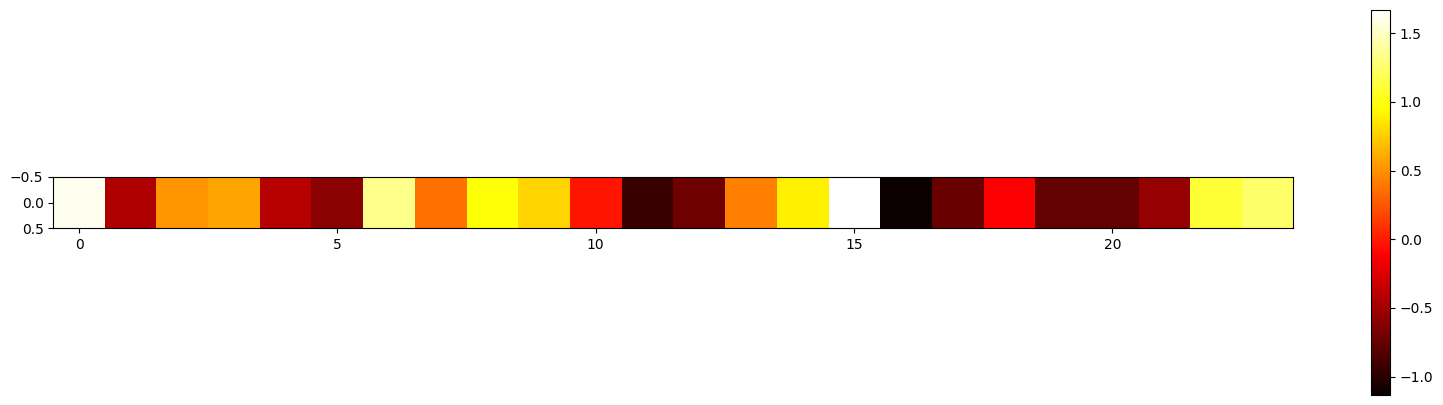

Model Number:  2
Data number:  877
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{15: 1.668782353401184, 0: 1.622626781463623, 6: 1.3488153219223022, 23: 1.2422306537628174, 22: 1.099890112876892, 8: 0.9687263369560242, 14: 0.8979873061180115, 9: 0.781083881855011, 3: 0.580207347869873, 2: 0.5147517323493958, 13: 0.4262998402118683, 7: 0.35899636149406433, 10: -0.020681798458099365, 18: -0.11280670017004013, 4: -0.4010271728038788, 1: -0.4356088936328888, 21: -0.5453026294708252, 5: -0.5954740643501282, 12: -0.7151254415512085, 17: -0.7347874641418457, 19: -0.7564836740493774, 20: -0.7603970170021057, 11: -0.9360153079032898, 16: -1.1339325904846191}
Total relevance: 4.36275527626276
[0, 2, 3, 6, 7, 8, 9, 13, 14, 15, 22, 23]


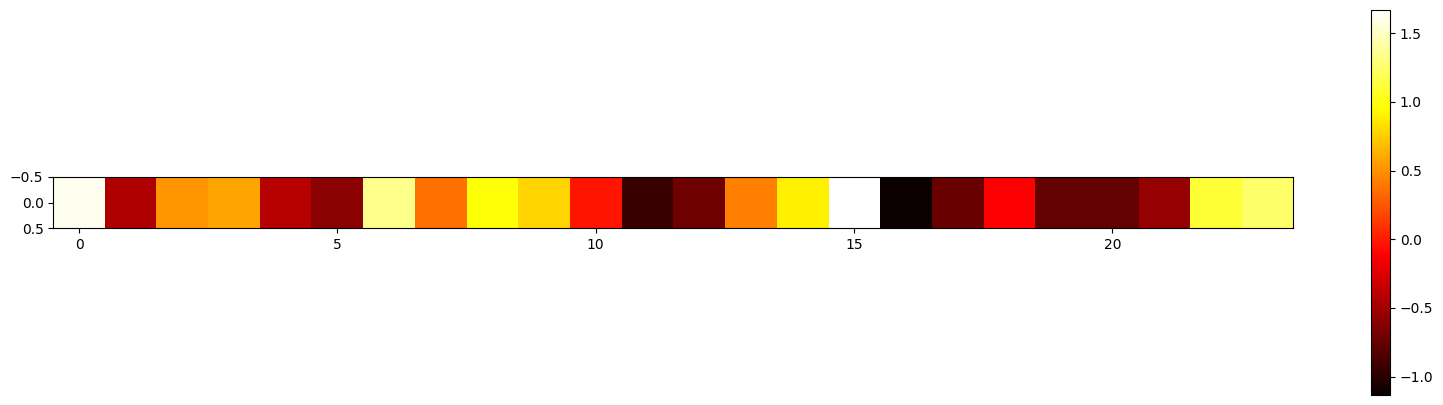

Model Number:  3
Data number:  877
Real Label:  3
1/1 [==============================] - 2s 2s/step
Prediction:  3
{15: 1.668782353401184, 0: 1.622626781463623, 6: 1.3488153219223022, 23: 1.2422306537628174, 22: 1.099890112876892, 8: 0.9687263369560242, 14: 0.8979873061180115, 9: 0.781083881855011, 3: 0.580207347869873, 2: 0.5147517323493958, 13: 0.4262998402118683, 7: 0.35899636149406433, 10: -0.020681798458099365, 18: -0.11280670017004013, 4: -0.4010271728038788, 1: -0.4356088936328888, 21: -0.5453026294708252, 5: -0.5954740643501282, 12: -0.7151254415512085, 17: -0.7347874641418457, 19: -0.7564836740493774, 20: -0.7603970170021057, 11: -0.9360153079032898, 16: -1.1339325904846191}
Total relevance: 4.36275527626276
[0, 2, 3, 6, 7, 8, 9, 13, 14, 15, 22, 23]


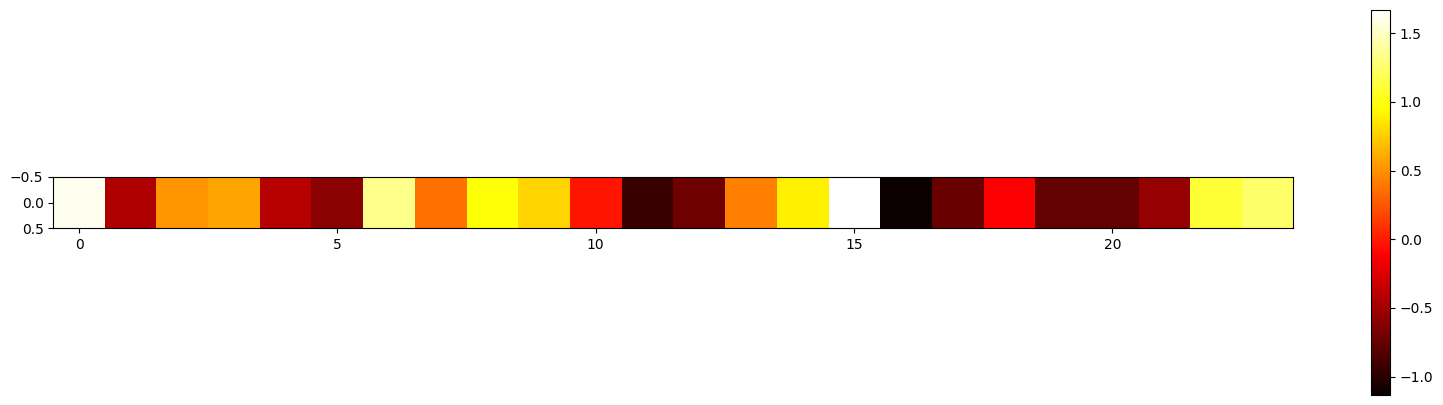

Model Number:  4
Data number:  877
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{15: 1.668782353401184, 0: 1.622626781463623, 6: 1.3488153219223022, 23: 1.2422306537628174, 22: 1.099890112876892, 8: 0.9687263369560242, 14: 0.8979873061180115, 9: 0.781083881855011, 3: 0.580207347869873, 2: 0.5147517323493958, 13: 0.4262998402118683, 7: 0.35899636149406433, 10: -0.020681798458099365, 18: -0.11280670017004013, 4: -0.4010271728038788, 1: -0.4356088936328888, 21: -0.5453026294708252, 5: -0.5954740643501282, 12: -0.7151254415512085, 17: -0.7347874641418457, 19: -0.7564836740493774, 20: -0.7603970170021057, 11: -0.9360153079032898, 16: -1.1339325904846191}
Total relevance: 4.36275527626276
[0, 2, 3, 6, 7, 8, 9, 13, 14, 15, 22, 23]


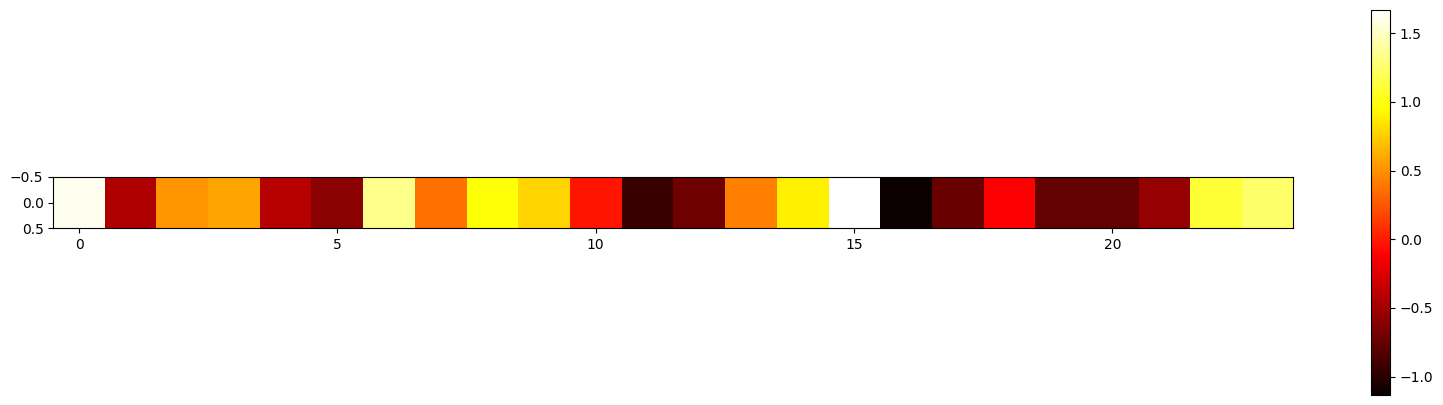

Model Number:  5
Data number:  877
Real Label:  3
1/1 [==============================] - 1s 1s/step
Prediction:  3
{15: 1.668782353401184, 0: 1.622626781463623, 6: 1.3488153219223022, 23: 1.2422306537628174, 22: 1.099890112876892, 8: 0.9687263369560242, 14: 0.8979873061180115, 9: 0.781083881855011, 3: 0.580207347869873, 2: 0.5147517323493958, 13: 0.4262998402118683, 7: 0.35899636149406433, 10: -0.020681798458099365, 18: -0.11280670017004013, 4: -0.4010271728038788, 1: -0.4356088936328888, 21: -0.5453026294708252, 5: -0.5954740643501282, 12: -0.7151254415512085, 17: -0.7347874641418457, 19: -0.7564836740493774, 20: -0.7603970170021057, 11: -0.9360153079032898, 16: -1.1339325904846191}
Total relevance: 4.36275527626276
[0, 2, 3, 6, 7, 8, 9, 13, 14, 15, 22, 23]


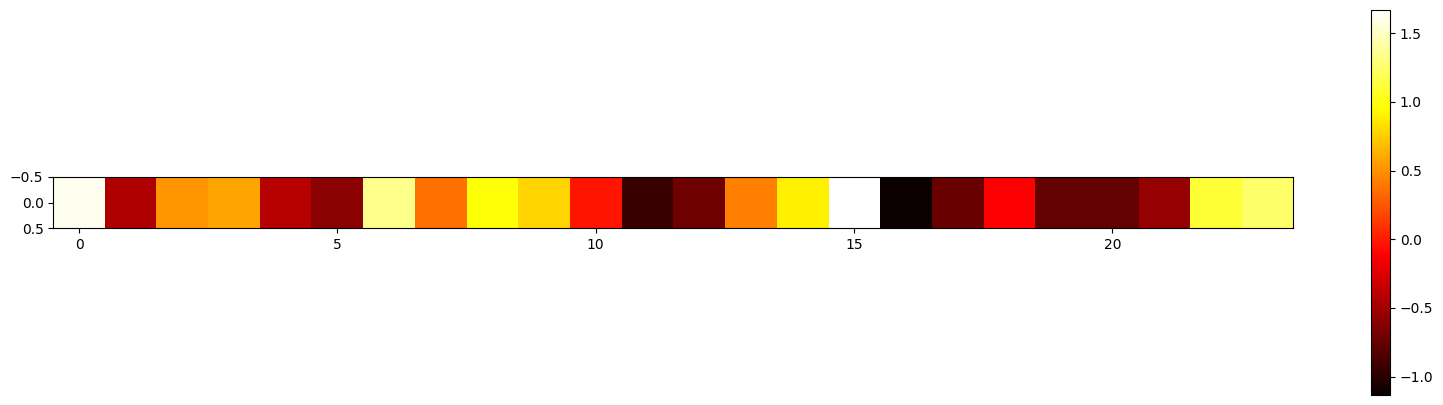

In [14]:
for i, model in enumerate(cnn_attention_gru_tuning):
    print("Model Number: ", i+1)
    XAI_pred(model, random_number)


In [15]:
def calculate_avg_relevance(model, X_resampling, y_resampling):
    correct_predictions = []
    
    for i in range(len(X_resampling)):
        pred = model.predict(X_resampling[i].reshape(1, -1, 1))
        prediction = np.argmax(pred)
        
        if prediction == y_resampling[i]:
            correct_predictions.append((i, prediction))
    
    # Kelompokkan berdasarkan label yang benar
    grouped_indices = {}
    for idx, label in correct_predictions:
        if label not in grouped_indices:
            grouped_indices[label] = []
        grouped_indices[label].append(idx)
    
    # Rata-rata relevansi untuk masing-masing label
    avg_relevances = {}
    
    for label, indices in grouped_indices.items():
        relevances = []
        for idx in indices:
            analyzer = innvestigate.create_analyzer('input', model)
            relevance = analyzer.analyze(X_resampling[idx].reshape(1, -1, 1))
            relevances.append(relevance.squeeze())
        
        avg_relevance = np.mean(relevances, axis=0)
        avg_relevances[label] = avg_relevance
    
    return avg_relevances

In [16]:
def display_top_relevance_features(avg_relevances, top_n=5):
    for label, avg_relevance in avg_relevances.items():
        print(f"Label: {label}")
        
        # Urutkan relevansi dan ambil top_n tertinggi
        sorted_relevance = sorted(enumerate(avg_relevance), key=lambda x: x[1], reverse=True)
        top_relevance = sorted_relevance[:top_n]
        
        top_dict = {index: value for index, value in top_relevance}
        print("Top relevance features:", top_dict)
        
        # Plot relevansi rata-rata
        plt.figure(figsize=(10, 2))
        plt.bar(range(len(avg_relevance)), avg_relevance, label=f'Label {label}')
        plt.xlabel('Fitur')
        plt.ylabel('Rata-rata Relevansi')
        plt.title(f'Relevansi Rata-rata Fitur untuk Label {label}')
        plt.legend()
        plt.show()

1/1 [==============================] - 0s 28ms/step
Label: 4
Top relevance features: {0: 0.5051992, 12: 0.35748583, 17: 0.28002325, 18: 0.27841324, 6: 0.26716623}


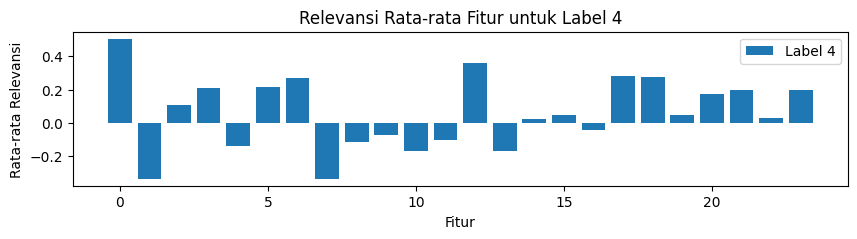

Label: 1
Top relevance features: {1: 0.6673372, 23: 0.4093646, 22: 0.3214029, 4: 0.18482655, 17: 0.009130155}


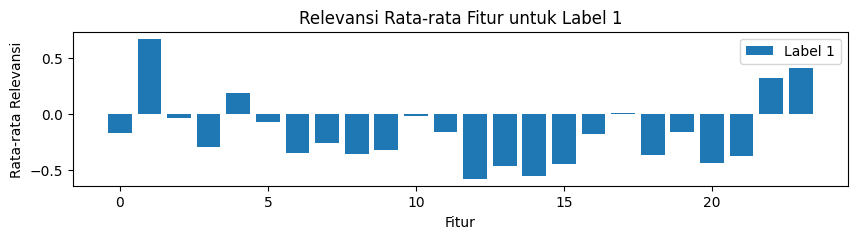

Label: 6
Top relevance features: {15: 0.31199452, 14: 0.30416462, 13: 0.20375882, 22: 0.15419063, 7: 0.13922818}


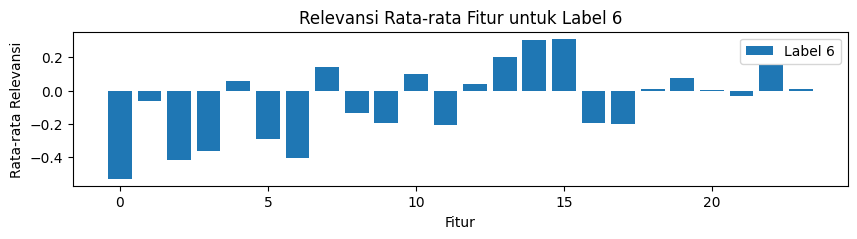

Label: 9
Top relevance features: {16: 0.7225038, 11: 0.43681762, 17: 0.3728886, 21: 0.3507168, 20: 0.34831992}


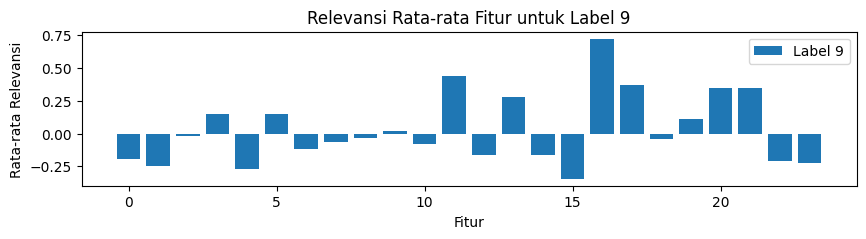

Label: 0
Top relevance features: {0: 0.94148344, 21: 0.65339583, 20: 0.5309514, 12: 0.5282797, 17: 0.50281715}


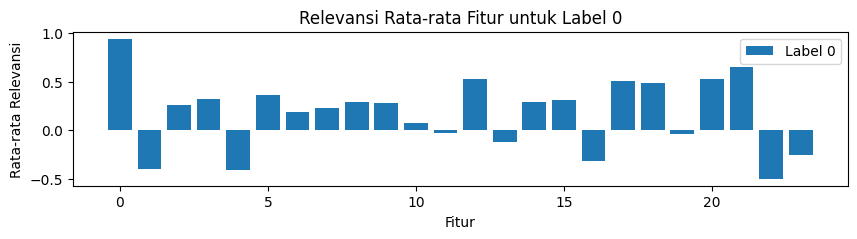

Label: 2
Top relevance features: {11: 0.73116803, 5: 0.70566434, 4: 0.64324975, 22: 0.62231266, 15: 0.4443696}


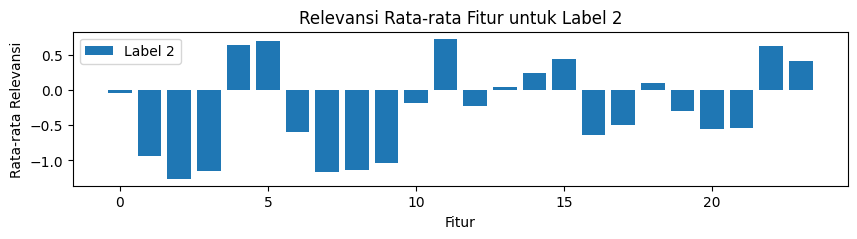

Label: 7
Top relevance features: {1: 0.42814505, 10: 0.3080064, 4: 0.14881913, 16: 0.04090427, 7: 0.0153001975}


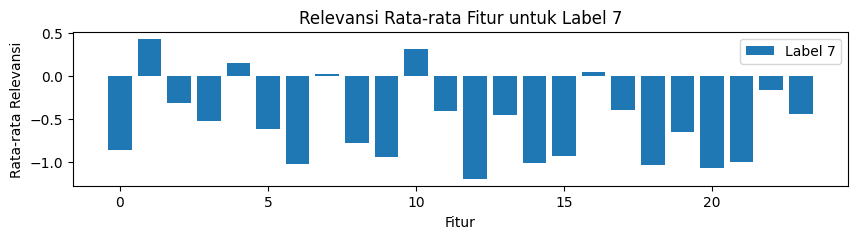

Label: 3
Top relevance features: {9: 0.8591797, 8: 0.7334062, 12: 0.56758296, 18: 0.49631324, 6: 0.48395732}


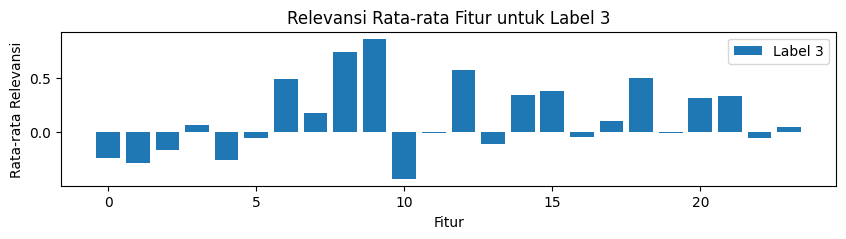

Label: 5
Top relevance features: {0: 0.42497036, 10: 0.40479934, 3: 0.3748123, 16: 0.3683288, 21: 0.35702327}


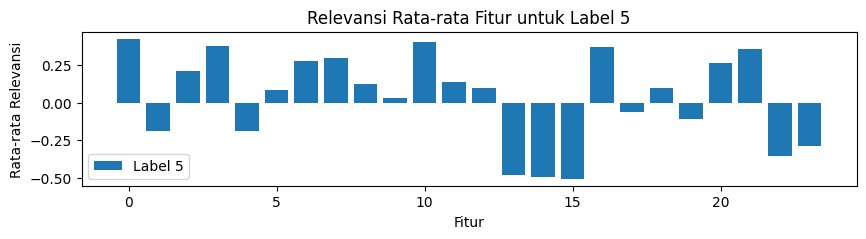

Label: 8
Top relevance features: {2: 1.6481719, 8: 1.419626, 9: 1.3854425, 1: 1.3854138, 6: 1.278134}


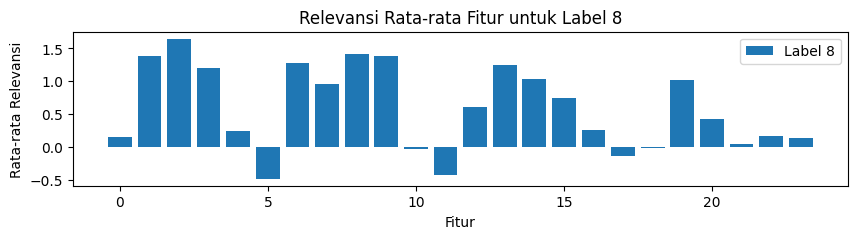

In [18]:
avg_relevance = calculate_avg_relevance(cnn_gru_tuning[1], X_resampling, y_resampling)
display_top_relevance_features(avg_relevance)